<a href="https://colab.research.google.com/github/FredLongo/DataMiningProject/blob/main/codesandbox/PullStockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pulling off stock prices for project
refrence video: https://www.youtube.com/watch?v=0LrQzs4pD_g


In [2]:
!pip install yahoo_fin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=aece5ab7111c6a38f5a18cc716e3d678a95b392fa21334060c8e23e1c32e1169
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=101c489572a7581df394feb1957d98e43f1dd99b634a0a5a1041158fc316f5bb
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found exist

In [3]:
from yahoo_fin.stock_info import *

In [5]:
print(get_live_price("META"))

336.9800109863281


In [6]:
get_quote_table("META")

/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


{'1y Target Est': 340.42,
 '52 Week Range': '108.32 - 341.87',
 'Ask': '336.38 x 1300',
 'Avg. Volume': 20233659.0,
 'Beta (5Y Monthly)': 1.21,
 'Bid': '336.00 x 1000',
 "Day's Range": '335.90 - 339.90',
 'EPS (TTM)': 11.32,
 'Earnings Date': 'Jan 30, 2024 - Feb 05, 2024',
 'Ex-Dividend Date': nan,
 'Forward Dividend & Yield': 'N/A (N/A)',
 'Market Cap': '865.991B',
 'Open': 338.33,
 'PE Ratio (TTM)': 29.77,
 'Previous Close': 339.97,
 'Quote Price': 336.9800109863281,
 'Volume': 11991932.0}

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
PARAMS = {
    't': '6mo',
    'tickers': 'GOOG, AMZN, AAPL, META, MSFT, NVDA, TSLA'
    }

In [12]:
data = yf.Tickers(PARAMS.get('tickers'))




In [13]:
hist = data.history(PARAMS.get('t'))
hist   # view the dataframe

[*********************100%%**********************]  7 of 7 completed


In [19]:
hist.columns


MultiIndex([(       'Close', 'AAPL'),
            (       'Close', 'AMZN'),
            (       'Close', 'GOOG'),
            (       'Close', 'META'),
            (       'Close', 'MSFT'),
            (       'Close', 'NVDA'),
            (       'Close', 'TSLA'),
            (   'Dividends', 'AAPL'),
            (   'Dividends', 'AMZN'),
            (   'Dividends', 'GOOG'),
            (   'Dividends', 'META'),
            (   'Dividends', 'MSFT'),
            (   'Dividends', 'NVDA'),
            (   'Dividends', 'TSLA'),
            (        'High', 'AAPL'),
            (        'High', 'AMZN'),
            (        'High', 'GOOG'),
            (        'High', 'META'),
            (        'High', 'MSFT'),
            (        'High', 'NVDA'),
            (        'High', 'TSLA'),
            (         'Low', 'AAPL'),
            (         'Low', 'AMZN'),
            (         'Low', 'GOOG'),
            (         'Low', 'META'),
            (         'Low', 'MSFT'),
            

In [20]:
# to normalize  (Closing price / First Closing price  ) -1

indexed = hist[['Close']] /  hist[['Close']].iloc[0] - 1

In [22]:
indexed  # This is our cumulated data seres

Close                                                    \
                AAPL      AMZN      GOOG      META      MSFT      NVDA   
Date                                                                     
2023-05-22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2023-05-23 -0.015155 -0.000174 -0.020497 -0.006363 -0.018432 -0.015653   
2023-05-24 -0.013548  0.015129 -0.033606  0.003584 -0.022822 -0.020464   
2023-05-25 -0.006946 -0.000087 -0.012076  0.017598  0.014758  0.218245   
2023-05-26  0.007061  0.044344 -0.003496  0.055251  0.036459  0.249230   
...              ...       ...       ...       ...       ...       ...   
2023-11-15  0.082158  0.245109  0.083499  0.339844  0.155752  0.568421   
2023-11-16  0.091943  0.241892  0.101931  0.345804  0.176074  0.587413   
2023-11-17  0.091828  0.262325  0.087948  0.349227  0.156315  0.581574   
2023-11-20  0.101958  0.270585  0.095734  0.369080  0.180045  0.617217   
2023-11-21  0.097296  0.251195  0.101295  0.357039  0.166382  0.602299   

                      
                TSLA  
Date                  
2023-05-22  0.000000  
2023-05-23 -0.016413  
2023-05-24 -0.031609  
2023-05-25 -0.023296  
2023-05-26  0.022767  
...              ...  
2023-11-15  0.285752  
2023-11-16  0.236777  
2023-11-17  0.240536  
2023-11-20  0.247419  
2023-11-21  0.277069  

[128 rows x 7 columns]

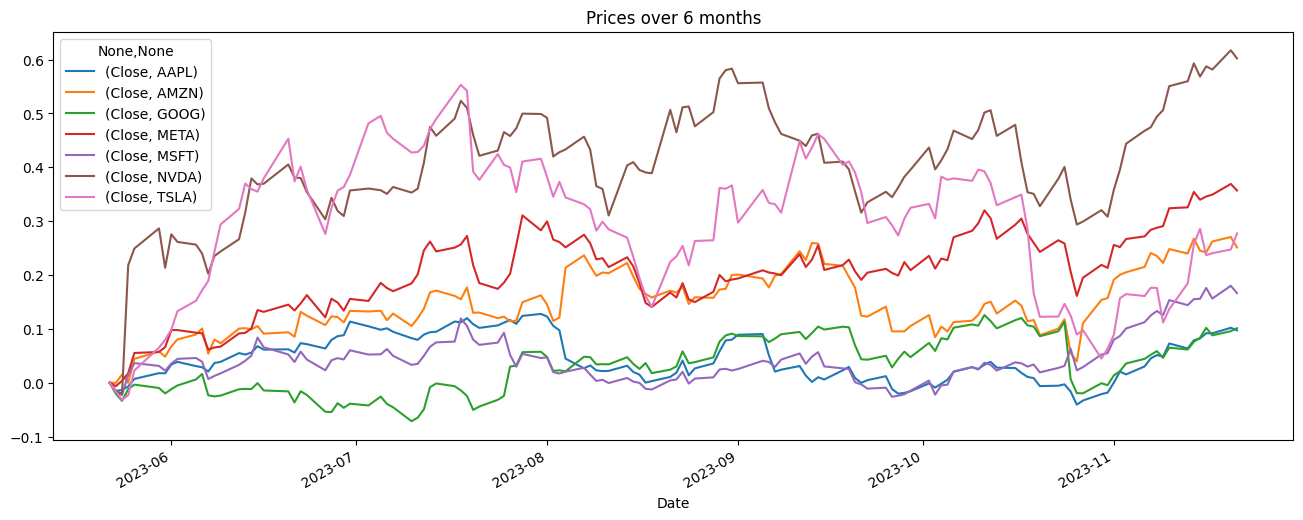

In [23]:
indexed.plot(figsize= (16,6))
plt.title('Prices over 6 months')
plt.show()